# OREDP Boundaries

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch
import seaborn as sns

## OREDP Assessment Zone

<https://www.isde.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.marine.data:dataset.2212>

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "oredp_zone")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://atlas.marine.ie/midata/EnergyResourcesTidal/"
    "OREDP_Assessment_Zone.shapezip.zip"
)
KNOWN_HASH = None
FILE_NAME = "OREDP_Assessment_Zone.shapezip.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [3]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-13]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: ec841f0592b73101ab63207bf225a498f3602a706c1d4ba96c2cc379f48543f1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [4]:
with open(f"{DATA_FILE[:-13]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-10-28 16:56:00.718915+00:00
Download URL: http://atlas.marine.ie/midata/EnergyResourcesTidal/OREDP_Assessment_Zone.shapezip.zip


In [3]:
ZipFile(DATA_FILE).namelist()

['OREDP_Assessment_Zone.dbf',
 'OREDP_Assessment_Zone.prj',
 'OREDP_Assessment_Zone.shp',
 'OREDP_Assessment_Zone.shx']

In [4]:
data = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [9]:
data

,gml_id,OBJECTID,beginLifes,endLifespa,datasetNam,localId,inspireId,inspireThe,version,descriptio,...,verticalRe,scale,coordinate,styleLayer,licence,dataProven,dataAccess,area,measureUni,geometry
0,F25__1,1,2014-02-04T00:00:00,2016-09-26T10:30:00,Offshore Renewable Energy Development Plan Ass...,2,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,"Wave, Tidal and Offshore Wind Energy Resource ...",...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,"OREDP Light Blue Fill (RGB: 214,214,255) with ...",https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,6402.82415179468,https://en.wikipedia.org/wiki/Square_kilometre,"POLYGON ((-6.07471 53.16318, -5.33223 53.25715..."
1,F25__2,2,2014-02-04T00:00:00,2016-09-26T10:30:00,Offshore Renewable Energy Development Plan Ass...,3,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,"Wave, Tidal and Offshore Wind Energy Resource ...",...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,"OREDP Medium Blue Fill (RGB: 123,136,219) with...",https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,25424.4133691115,https://en.wikipedia.org/wiki/Square_kilometre,"POLYGON ((-6.44139 52.10963, -5.83231 51.99958..."
2,F25__3,3,2014-02-04T00:00:00,2016-09-26T10:30:00,Offshore Renewable Energy Development Plan Ass...,4,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,"Wave, Tidal and Offshore Wind Energy Resource ...",...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,"OREDP Blue Fill (RGB: 51,87,184) with no outline",https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,14637.2016940825,https://en.wikipedia.org/wiki/Square_kilometre,"MULTIPOLYGON (((-9.20667 51.50565, -9.12729 51..."
3,F25__4,4,2014-02-04T00:00:00,2016-09-26T10:30:00,Offshore Renewable Energy Development Plan Ass...,5,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,"Wave, Tidal and Offshore Wind Energy Resource ...",...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,"OREDP Blue Fill (RGB: 51,87,184) with no outline",https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,21466.0476613179,https://en.wikipedia.org/wiki/Square_kilometre,"POLYGON ((-10.07338 54.29043, -10.07113 54.274..."
4,F25__5,5,2014-02-04T00:00:00,2016-09-26T10:30:00,Offshore Renewable Energy Development Plan Ass...,6,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,"Wave, Tidal and Offshore Wind Energy Resource ...",...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,"OREDP Dark Blue Fill (RGB:0,57,148) with no ou...",https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,24031.6715809967,https://en.wikipedia.org/wiki/Square_kilometre,"POLYGON ((-10.07338 54.29043, -10.68862 54.306..."
5,F25__6,6,2014-02-04T00:00:00,2016-09-26T10:30:00,Offshore Renewable Energy Development Plan Ass...,1,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,"Wave, Tidal and Offshore Wind Energy Resource ...",...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,"OREDP Medium Blue Fill (RGB: 123,136,219) with...",https://cre

In [5]:
data.shape

(6, 30)

In [17]:
data.columns

Index(['gml_id', 'OBJECTID', 'beginLifes', 'endLifespa', 'datasetNam',
       'localId', 'inspireId', 'inspireThe', 'version', 'descriptio', 'zone',
       'resource', 'potentialT', 'typeOfReso', 'documentCi', 'documentNa',
       'documentUR', 'name', 'validTime', 'verticalEx', 'verticalRe', 'scale',
       'coordinate', 'styleLayer', 'licence', 'dataProven', 'dataAccess',
       'area', 'measureUni', 'geometry'],
      dtype='object')

In [12]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/run/media/nms/Backup/Documents/Git/hydrogen-salt-storage-optimisation/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


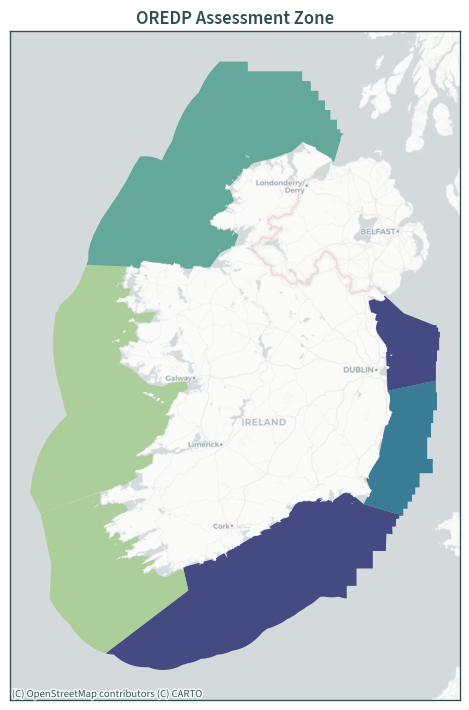

In [4]:
ax = data.to_crs(3857).plot(
    figsize=(7.5, 7.5), column="styleLayer", alpha=.85,
    cmap=sns.color_palette("crest", as_cmap=True)
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title("OREDP Assessment Zone")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## OREDP Study Area

<https://www.isde.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.marine.data:dataset.2214>

In [6]:
URL = (
    "https://atlas.marine.ie/midata/EnergyResourcesTidal/"
    "OREDP_Study_Area.shapezip.zip"
)
FILE_NAME = "OREDP_Study_Area.shapezip.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

In [27]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-13]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: ae3f6c926f346c6bc1d5414ee4b77e4f046f25d7979ed9ed3c8ee52ee5ce62cf
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [4]:
with open(f"{DATA_FILE[:-13]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-10-28 17:05:45.443445+00:00
Download URL: http://atlas.marine.ie/midata/EnergyResourcesTidal/OREDP_Study_Area.shapezip.zip


In [7]:
ZipFile(DATA_FILE).namelist()

['OREDP_Study_Area.dbf',
 'OREDP_Study_Area.prj',
 'OREDP_Study_Area.shp',
 'OREDP_Study_Area.shx']

In [8]:
data2 = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [32]:
data2

,gml_id,OBJECTID,beginLifes,endLifespa,datasetNam,localId,inspireId,inspireThe,version,descriptio,...,verticalRe,scale,coordinate,styleLayer,licence,dataProven,dataAccess,length,measureUni,geometry
0,F24__1,1,2014-02-04T00:00:00,2016-09-26T09:50:00,Offshore Renewable Energy Development Plan Stu...,NorthAtlantic200mContour,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,SEA Study Area included All Irish waters from ...,...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,OREDP dashed polyline 3 pixel width with Blue ...,https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,650.985344150004,http://dbpedia.org/resource/Nautical_mile,"LINESTRING (-9.59996 48.56993, -9.60155 48.569..."
1,F24__2,2,2014-02-04T00:00:00,2016-09-26T09:50:00,Offshore Renewable Energy Development Plan Stu...,NorthAtlanticEEZboundary,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,SEA Study Area included All Irish waters from ...,...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,OREDP dashed polyline 3 pixel width with Blue ...,https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,133.608654722507,http://dbpedia.org/resource/Nautical_mile,"LINESTRING (-6.80000 55.42594, -6.75000 55.466..."
2,F24__3,3,2014-02-04T00:00:00,2016-09-26T09:50:00,Offshore Renewable Energy Development Plan Stu...,IrishSeaCelticSeaEEZboundary,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,SEA Study Area included All Irish waters from ...,...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,OREDP dashed polyline 3 pixel width with Blue ...,https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,505.032066472472,http://dbpedia.org/resource/Nautical_mile,"MULTILINESTRING ((-9.60000 48.57109, -9.60000 ..."
3,F24__4,4,2014-02-04T00:00:00,2016-09-26T09:50:00,Offshore Renewable Energy Development Plan Stu...,IrishSeaCelticSeaEEZboundary,ER.RenewableAndWastePotentialCoverage.IE.DCCAE...,http://inspire.ec.europa.eu/theme/er,2014-02-04T00:00:00,SEA Study Area included All Irish waters from ...,...,http://www.opengis.net/def/crs/EPSG/0/5731,"1:50,000",http://www.opengis.net/def/crs/EPSG/0/4326,OREDP dashed polyline 3 pixel width with Blue ...,https://creativecommons.org/licenses/by/4.0/,Offshore Renewable Energy Development Plan Str...,http://atlas.marine.ie/arcgis/rest/services/En...,0.0700922583517836,http://dbpedia.org/resource/Nautical_mile,"LINESTRING (-9.60000 48.57109, -9.59996 48.56993)"


In [9]:
data2.shape

(4, 30)

In [37]:
data2.columns

Index(['gml_id', 'OBJECTID', 'beginLifes', 'endLifespa', 'datasetNam',
       'localId', 'inspireId', 'inspireThe', 'version', 'descriptio',
       'contour', 'designatio', 'potentialT', 'typeOfReso', 'documentCi',
       'documentNa', 'documentUR', 'name', 'validTime', 'verticalEx',
       'verticalRe', 'scale', 'coordinate', 'styleLayer', 'licence',
       'dataProven', 'dataAccess', 'length', 'measureUni', 'geometry'],
      dtype='object')

In [8]:
data2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/run/media/nms/Backup/Documents/Git/hydrogen-salt-storage-optimisation/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


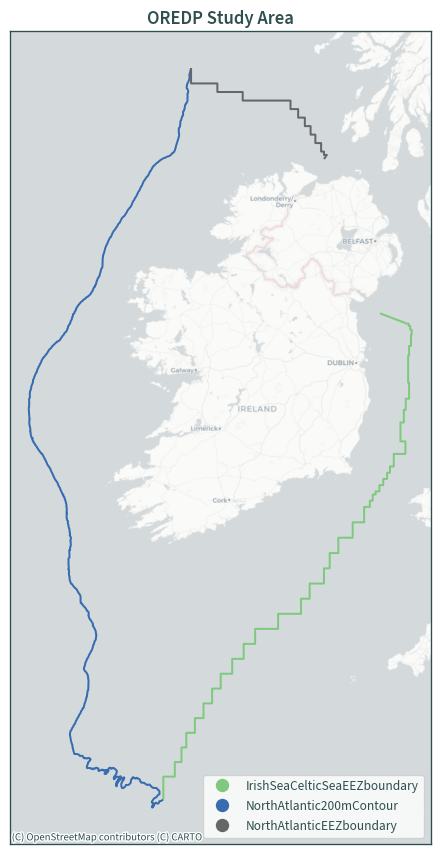

In [9]:
ax = data2.to_crs(3857).plot(
    figsize=(9, 9), column="localId", legend=True,
    legend_kwds={"loc": "lower right"}, cmap="Accent"
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title("OREDP Study Area")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()